In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Read the output of the model 

Load the data (labels and model output)

In [12]:
labels = np.load('../dataset_picked/target_picked.npy')
model_output = np.load('../inference/inference_outputs.npy')[:,0]
print(np.shape(labels))
print(np.shape(model_output))

(1500,)
(1500,)


Check qualitataively on random sample

In [13]:
idx = np.random.randint(0, len(labels))

print(labels[idx])
print(model_output[idx])

2.78
2.8961031


Create an error array

In [14]:
error = (labels - model_output)
x_error = np.arange(0, len(error))

mean= np.mean(error)
std = np.std(error)
print(mean)
print(std)

-0.114154704
2.714122


Plot the error and find mean and standard deviation

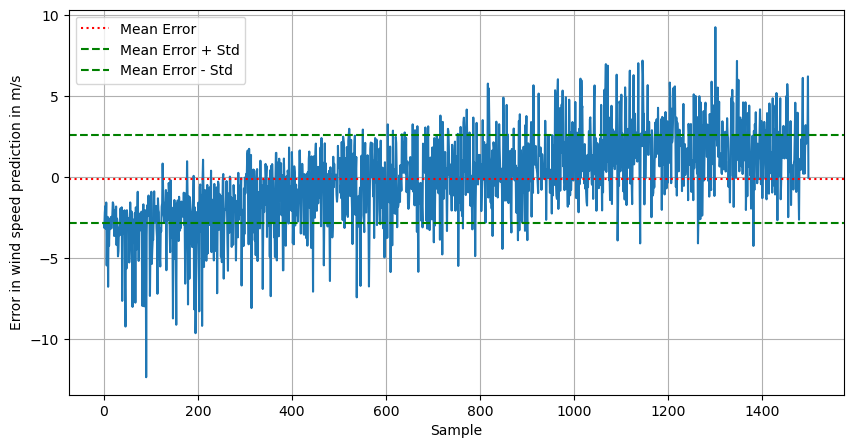

In [15]:
plt.figure(figsize=(10,5))
plt.plot(x_error,error)
plt.ylabel('Error in wind speed prediction in m/s')
plt.xlabel('Sample')
plt.grid()

plt.axhline(y=mean, color='r', linestyle=':', label='Mean Error')
plt.axhline(y=mean+std, color='g', linestyle='--', label='Mean Error + Std')
plt.axhline(y=mean-std, color='g', linestyle='--', label='Mean Error - Std')
plt.legend()

Find distribution of error

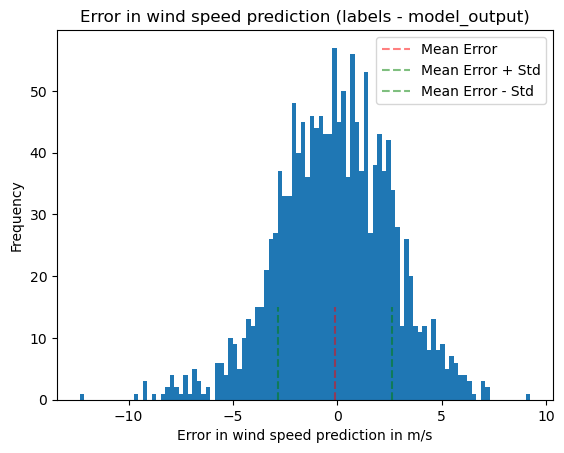

In [16]:
plt.hist(error, bins=100)
plt.xlabel('Error in wind speed prediction in m/s')
plt.ylabel('Frequency')
plt.title('Error in wind speed prediction (labels - model_output)')
plt.vlines(mean, 0, 15, colors='r', linestyles='dashed', label='Mean Error',alpha=0.5)
plt.vlines(mean+std, 0, 15, colors='g', linestyles='dashed', label='Mean Error + Std',alpha=0.5)
plt.vlines(mean-std, 0, 15, colors='g', linestyles='dashed', label='Mean Error - Std',alpha=0.5)
plt.legend()

Create visual representation of the model output vs label

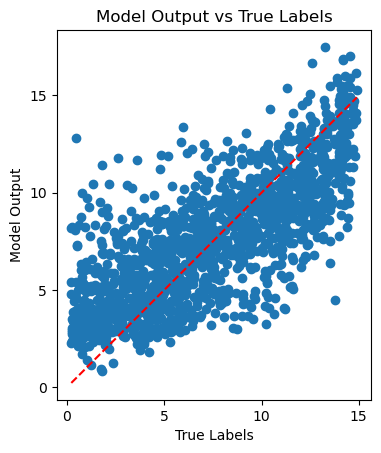

In [17]:
plt.plot(labels, model_output, 'o')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('True Labels')
plt.ylabel('Model Output')
plt.title('Model Output vs True Labels')
plt.xticks(np.arange(0, 30, 5))
plt.yticks(np.arange(0, 30, 5))
plt.plot([min(labels), max(labels)], [min(labels), max(labels)], 'r--')  # y = x reference line
plt.show()